In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Preprocessing data
categorical_columns = ['gender', 'smoking_status', 'ever_married', 'work_type', 'Residence_type']
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Filling the columns with N/A values
data.fillna(data.mean(), inplace=True)

X = data.drop(["id", "stroke"], axis=1)
y = data["stroke"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

In [4]:
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

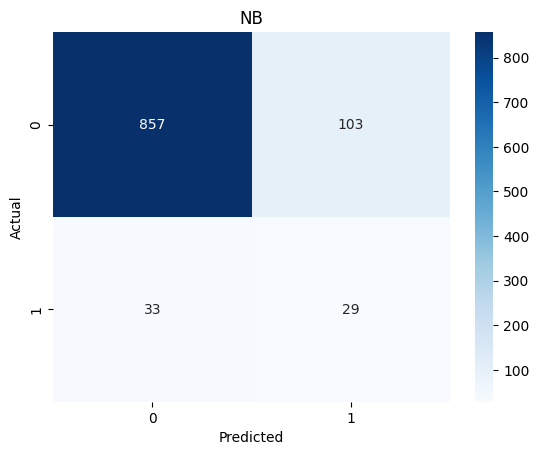

In [5]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('NB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [6]:
print(report)

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       960
           1       0.22      0.47      0.30        62

    accuracy                           0.87      1022
   macro avg       0.59      0.68      0.61      1022
weighted avg       0.92      0.87      0.89      1022

